<h2 class='alert alert-info'>Wordcloud</h2>
HSL <a href='https://www.w3schools.com/colors/colors_hsl.asp'>Click aquí...</a>
<br>
Color chooser <a href='https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html'>Click aquí...</a>
<br>
Special charts and regex <a href='https://amueller.github.io/word_cloud/auto_examples/emoji.html'>Click aquí...</a>
<br>
Frecuency <a href='https://amueller.github.io/word_cloud/auto_examples/frequency.html'>Click aquí...</a>

In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import re
import string
import random
import multidict as multidict
import spacy

nlp = spacy.load("en_core_web_sm")

In [2]:
df_f = pd.read_csv(r"test2.csv")

In [3]:
df_f.head()

,DOMINIO,stats2,Frec
0,invalido,SIN CORREO,3179
1,invalido,u@posadas.com,758
2,invalido,u@m.expediapartnercentral.com,610
3,invalido,u@yahoo.com.mx,50
4,invalido,u@anahuac.mx,20


In [4]:
df = pd.read_csv(r"test.csv")

In [5]:
df.head()

,email_contacto,DOMINIO,VAL,ARR,stats2
0,#############,invalido,unico,8/6/2020,(551) 507-8490
1,#############,invalido,unico,8/7/2020,u@m.expediapartnercentral.com
2,#############,invalido,unico,8/6/2020,u@m.expediapartnercentral.com
3,#############,invalido,unico,8/6/2020,u@m.expediapartnercentral.com
4,#############,invalido,unico,8/8/2020,u@m.expediapartnercentral.com


In [6]:
df.shape

(6036, 5)

In [7]:
def getFrequencyDictForText(sentence,regex,all_regex=False):
    """"""
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}
    regex=regex
    for text in sentence.split(" "):
        if all_regex:
            if tmpDict.get(text) != None:
                tmpDict[text] = tmpDict.get(text) + 1
            else:
                tmpDict[text] = 1
        else:
            if re.search(regex,text):
                val = tmpDict.get(text, 0)
                tmpDict[text.lower()] = val + 1
    print(tmpDict)
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

def mail_WordCloud(dataframe , regex="\w[\w']+", flag_frecuencia=False, minimo_conteo=2, columna_correo='stats', columna_conteo='Frec', save_fig=True, path='foo.png',all_regex=False,**kargs):
    """"""
    comment_words = ""
    #if all_regex: 
    #    dataframe[columna_correo] = [row.replace(' ','_') if ' ' in row else row for row in dataframe[columna_correo]]
    if flag_frecuencia:
        dataframe = dataframe.loc[dataframe[columna_conteo]>=minimo_conteo]
        l = [(mail+' ')*frec for mail,frec in zip(dataframe[columna_correo],dataframe[columna_conteo])]
        comment_words = " ".join(l)
    else:
        dataframe = dataframe.groupby([columna_correo])[columna_correo].count().reset_index(name='frec')
        dataframe = dataframe.loc[dataframe['frec']>=minimo_conteo]
        l = [(mail+' ')*frec for mail,frec in zip(dataframe[columna_correo],dataframe['frec'])]
        comment_words = " ".join(l)
    print("Comment_Words",comment_words)
    wordcloud = WordCloud(
        **kargs
    )
    text = getFrequencyDictForText(comment_words,regex,all_regex)
    print(text)
    wordcloud.generate_from_frequencies(frequencies=text,max_font_size=80)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.show() 
    if save_fig and path != None:
        if 'png' in path: 
            wordcloud.to_file(path) #Nombre d ela imagen
        else: 
            wordcloud.to_file(path+'.png') #Nombre d ela imagen
    return wordcloud

### Frecuencia True

Comment_Words SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN CORREO SIN COR

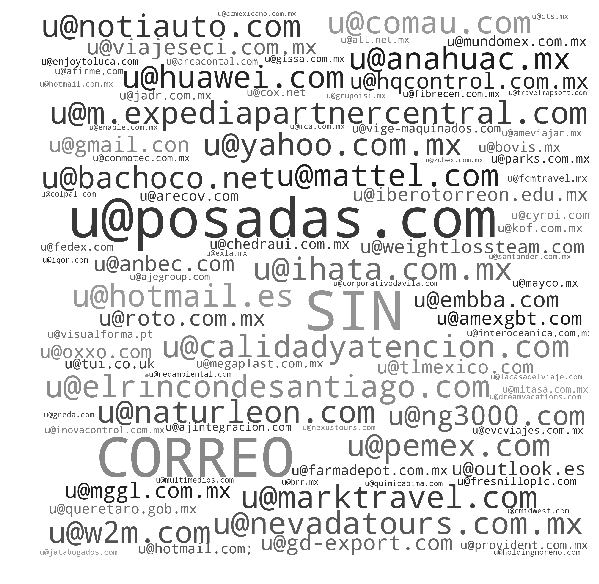

In [8]:
regex = '^[a-zA-Z0-9._-]+@[a-zA-Z0-9.-]+\.([a-zA-Z]{2,4})+$'
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(10, 60) #Tonalidades de Gris
kargs = {
    'width' : 800, 
    'height' : 800,
    'background_color' :None,
    'scale':3,
    'relative_scaling':0.0,
    'max_font_size':None, #Int, default es un None
    'prefer_horizontal' : 180, #ángulo de inclinación de las letras, por defecto estan a 90 grados, 180 las pondria horizontales
    'color_func':grey_color_func, #Funcion de color
    'normalize_plurals':False, #Cuando tienes palabras como  Harry´s, Parks, los limpia para dejarlos sin el plural
    'collocations' : False, #Una mascara que te permite crear bigramas, si esta en True
    'repeat' : False, #Repeticiones en dado caso de que quieras mostrar ocurrencias pero en diferentes tamaños
    'mode' :'RGBA' #Parámetro para la transparencia, si no quieres la transparencia quita esto y sustituye por RGB, luego pon BackGroundColor, en white, black lo que quieras
}
word_cloud = mail_WordCloud(
    df_f,
    regex=regex,
    flag_frecuencia=True, 
    minimo_conteo=2,
    columna_correo='stats2',
    columna_conteo='Frec',
    all_regex=True,
    **kargs #Argumentos de la wordcloud
)

In [ ]:
df_f = df_f.loc[df_f['Frec']>=2]
l = [(mail+' ')*frec for mail,frec in zip(df_f['stats2'],df_f['Frec'])]
l_2 = []
for item in l: 
    for x in item.split(" "):
        l_2.append(x)
print(len(l_2),type(l_2),l_2)
comment_words = "|".join(l)
#comment_words

In [ ]:
palabras = '|'.join(['a']*10) 
palabras

### Frecuencia False

In [ ]:
regex = '^[a-zA-Z0-9._-]+@[a-zA-Z0-9.-]+\.([a-zA-Z]{2,4})+$'
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
kargs = {
    'width' : 800, 
    'height' : 800,
    'background_color' :"black",
    'prefer_horizontal' : 180,
    'color_func':grey_color_func,
    'normalize_plurals':False,
    'collocations' : False,
    'repeat' : False,
    'mode' :'RGB'
}
word_cloud = mail_WordCloud(
    df,
    regex=regex,
    flag_frecuencia=False, 
    minimo_conteo=50,
    columna_correo='stats2',
    columna_conteo='Frec',
    all_regex=True,
    **kargs
)

### Azúl verdoso

In [ ]:
regex = '^[a-zA-Z0-9._-]+@[a-zA-Z0-9.-]+\.([a-zA-Z]{2,4})+$'
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    h = random.randint(170, 185)
    s = random.randint(60, 75)
    l = random.randint(50, 60)
    return f"hsl({h},{s}%,{l}%)"
kargs = {
    'width' : 800, 
    'height' : 800,
    'background_color' :None,
    'prefer_horizontal' : 180,
    'color_func':grey_color_func,
    'normalize_plurals':False,
    'collocations' : False,
    'repeat' : False,
    'mode' :'RGBA'
}
word_cloud = mail_WordCloud(
    df_f,
    regex=regex,
    flag_frecuencia=True, 
    minimo_conteo=2,
    columna_correo='stats2',
    columna_conteo='Frec',
    **kargs
)

In [ ]:
doc = nlp('u@m.expediapartnercentral.com')

In [ ]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)